In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from csrl.mdp import GridMDP
import numpy as np 
from copy import deepcopy
from logger import Trace
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def smoothing(map_name, map_col, data_cols, extra, df, window=10, save=False):
    
    col_index = 0
    
    
    num_iterations = 1
    num_episodes = df.shape[0]
    
    print(f'episodes :{num_episodes}, iterations:{num_iterations}')                                                             
                                                                 
    
    df['mean_rew'] = df[data_cols].mean(axis=1)
    df['std'] = df[data_cols].std(axis=1)
    max_val = np.max(df[data_cols].max())
    min_val = np.min(df[data_cols].min())
    df['norm_mean'] = (df['mean_rew'] - min_val)/ (max_val - min_val)
    # .rolling(window=window).mean()
    
    print(df)
    print(df.describe())
    
    print('--- Smoothing...')
    
    smooth_df = df.copy()
    smooth_df['mean_smooth_rew'] =df['norm_mean'].rolling(window=window).mean()
    smooth_df['std_smooth_rew'] =df['norm_mean'].rolling(window=window).std()
    
    print(smooth_df)
    print(smooth_df.describe())
    
    new_file = 'graph_data/'
    # sum_df.to_csv(new_file, encoding='utf-8')
    if save:
        print('---- Saving :' + map_name)
        smooth_df.to_csv(new_file+map_name+'.csv', encoding='utf-8')
    else:
        return smooth_df

In [4]:
n_agents = 2
window=1000

### Load trace from file

In [5]:
map_name= 'benchmark1'
file= 'shared_oa_ex2_returns_df.csv'
array_file = 'shared_oa_ex2_returns.csv'

In [6]:
trace = Trace(n_agents, file)

In [7]:
# cols =  trace.columns
data_cols = [f'reward_{i}' for i in range(n_agents)]
map_col = 'map'
extra =[]# [f'std_dev_{i}' for i in range(n_agents)]
extra.append('mean_rew' )
extra.append('mean_std')


In [8]:
arr = np.loadtxt(array_file, delimiter=",")

In [9]:
df = pd.DataFrame(data = arr,
                  columns = data_cols)
df.head()

,reward_0,reward_1
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [10]:
sum_df=smoothing(map_name, map_col, data_cols, extra, df, window=window)

episodes :75000, iterations:1
       reward_0  reward_1  mean_rew  std  norm_mean
0          0.00      0.00      0.00  0.0        0.0
1          0.00      0.00      0.00  0.0        0.0
2          0.00      0.00      0.00  0.0        0.0
3          0.00      0.00      0.00  0.0        0.0
4          0.00      0.00      0.00  0.0        0.0
...         ...       ...       ...  ...        ...
74995      0.01      0.01      0.01  0.0        1.0
74996      0.01      0.01      0.01  0.0        1.0
74997      0.01      0.01      0.01  0.0        1.0
74998      0.01      0.01      0.01  0.0        1.0
74999      0.01      0.01      0.01  0.0        1.0

[75000 rows x 5 columns]
           reward_0      reward_1      mean_rew      std     norm_mean
count  75000.000000  75000.000000  75000.000000  75000.0  75000.000000
mean       0.004204      0.004204      0.004204      0.0      0.420427
std        0.004936      0.004936      0.004936      0.0      0.493631
min        0.000000      0.000000   

In [11]:
sum_df.shape


(75000, 7)

## Load baseline

In [12]:
array_file_base = 'shared_oa_ex2_returns_base.csv'
arrb = np.loadtxt(array_file_base, delimiter=",")

In [13]:
df_b = pd.DataFrame(data = arrb,
                  columns = data_cols)
df_b.head()

,reward_0,reward_1
0,10.0,12.0
1,10.0,12.0
2,12.0,12.0
3,12.0,14.0
4,10.0,12.0


In [14]:
np.max(df_b[data_cols].max())

14.0

In [15]:
sum_df_b=smoothing(map_name, map_col, data_cols, extra, df_b, window=1000)

episodes :75000, iterations:1
       reward_0  reward_1  mean_rew       std  norm_mean
0          10.0      12.0      11.0  1.414214   0.785714
1          10.0      12.0      11.0  1.414214   0.785714
2          12.0      12.0      12.0  0.000000   0.857143
3          12.0      14.0      13.0  1.414214   0.928571
4          10.0      12.0      11.0  1.414214   0.785714
...         ...       ...       ...       ...        ...
74995      12.0      12.0      12.0  0.000000   0.857143
74996      10.0      12.0      11.0  1.414214   0.785714
74997      12.0      12.0      12.0  0.000000   0.857143
74998      12.0      14.0      13.0  1.414214   0.928571
74999      10.0      12.0      11.0  1.414214   0.785714

[75000 rows x 5 columns]
           reward_0      reward_1      mean_rew           std     norm_mean
count  75000.000000  75000.000000  75000.000000  75000.000000  75000.000000
mean      10.802240     11.624640     11.213440      1.080685      0.800960
std        1.197265      2.15512

## Load alternate

In [16]:
array_file_alt = 'shared_oa_ex2_alt_returns.csv'
arr_alt = np.loadtxt(array_file_alt, delimiter=",")

In [17]:
df_alt = pd.DataFrame(data = arr_alt,
                  columns = data_cols)
df_alt.head()

,reward_0,reward_1
0,0.00,0.00
1,0.00,0.00
2,0.45,0.45
3,0.49,0.49
4,0.00,0.00


In [18]:
np.max(df_alt[data_cols].max())

0.6600000000000006

In [19]:
sum_df_alt=smoothing(map_name, map_col, data_cols, extra, df_alt, window=1000)

episodes :75000, iterations:1
       reward_0  reward_1  mean_rew  std  norm_mean
0          0.00      0.00      0.00  0.0   0.000000
1          0.00      0.00      0.00  0.0   0.000000
2          0.45      0.45      0.45  0.0   0.681818
3          0.49      0.49      0.49  0.0   0.742424
4          0.00      0.00      0.00  0.0   0.000000
...         ...       ...       ...  ...        ...
74995      0.62      0.62      0.62  0.0   0.939394
74996      0.60      0.60      0.60  0.0   0.909091
74997      0.62      0.62      0.62  0.0   0.939394
74998      0.66      0.66      0.66  0.0   1.000000
74999      0.64      0.64      0.64  0.0   0.969697

[75000 rows x 5 columns]
           reward_0      reward_1      mean_rew      std     norm_mean
count  75000.000000  75000.000000  75000.000000  75000.0  75000.000000
mean       0.492188      0.492188      0.492188      0.0      0.745740
std        0.231631      0.231631      0.231631      0.0      0.350956
min        0.000000      0.000000   

## Plotting

In [20]:
import tikzplotlib
import matplotlib
plt.style.use("seaborn-talk")
# matplotlib.use("pgf")
matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True
})


In [25]:
alternate = True
shaping = False

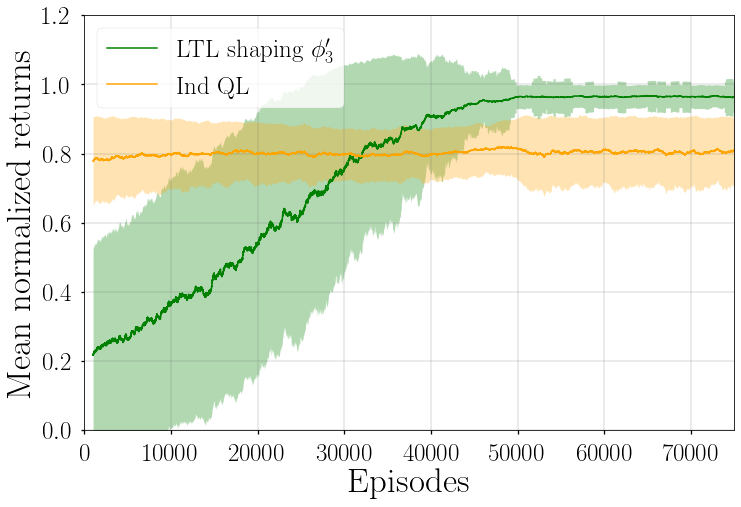

In [26]:
graphsize = 35
fig, axs = plt.subplots(1, 1)

if shaping:
    sum_df.plot(kind='line', y='mean_smooth_rew', ax=axs, label="LTL shaping $\phi_3$", linewidth=1.5, fontsize=graphsize-10)
    axs.fill_between(np.arange(0,sum_df.shape[0]), sum_df['mean_smooth_rew']-sum_df['std_smooth_rew'], sum_df['mean_smooth_rew']+sum_df['std_smooth_rew'],
                           alpha= 0.3, linewidth=0)
if alternate:
    sum_df_alt.plot(kind='line', y='mean_smooth_rew', ax=axs, label="LTL shaping $\phi_3'$", linewidth=1.5, fontsize=graphsize-10, c='green')
    axs.fill_between(np.arange(0,sum_df_alt.shape[0]), sum_df_alt['mean_smooth_rew']-sum_df_alt['std_smooth_rew'], sum_df_alt['mean_smooth_rew']+sum_df_alt['std_smooth_rew'],
                           alpha= 0.3, linewidth=0, color='green')
    
sum_df_b.plot(kind='line', y='mean_smooth_rew', ax=axs, label='Ind QL', linewidth=1.5, fontsize=graphsize-10, c='orange')
axs.fill_between(np.arange(0,sum_df_b.shape[0]), sum_df_b['mean_smooth_rew']-sum_df_b['std_smooth_rew'], sum_df_b['mean_smooth_rew']+sum_df_b['std_smooth_rew'],
                       alpha= 0.3, linewidth=0, color='orange')


# axs[1, 1].plot(x, -y, 'tab:red')
# axs.set_title('Benchmark 1', fontsize=25)
axs.legend(loc='upper left', fontsize=graphsize-10)
axs.ticklabel_format(axis='both')

# axs.set(xlabel='Episodes', ylabel='')
axs.set_xlabel('Episodes', fontsize=graphsize)
axs.set_ylabel('Mean normalized returns', fontsize=graphsize)
axs.set_ylim([0, 1.2])
axs.set_xlim([0, sum_df.shape[0]])
axs.grid(b=True, which='major', color='#666666', linestyle='-', linewidth=0.25)

plt.tight_layout()
plt.show()

In [27]:
map_name='benchmark1_phi3_prime'

In [28]:
fig.savefig("graph_data/"+map_name+".png", transparent=True, dpi=600)

In [73]:
tikzplotlib.clean_figure(fig=fig, target_resolution=300)


In [75]:
# Save a LateX graph file. Turned out to be too large even after cleaning

tikzplotlib.save("graph_data/learning_curve_"+map_name+".tex", figure=fig)